# Codecademy project: Analysis on GDP and Life Expectancy
***

Source: World Health Organization and the World Bank



## 1. Exploratory Data Analysis
***

First, let's import and store the data and have a look at it.

In [1]:
#import libraries
import pandas as pd
import numpy as np

# store the data into panda dataframe
all_data = pd.read_csv('all_data.csv')

# have a look to the data
print(all_data.info())
print('\n')
print(all_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


We have a dataframe of 4 columns: 
* Country - string: country which data are describing
* Year - integer 
* Life expectancy at birth - float: average length of life of actual born individuals in the given year/country.
* GDP - float: Gross domestic product (GDP) is the total monetary or market value of all the finished goods and services produced within a country’s borders in a specific time period (here: one year).


It will also be interesting to know how many countries are included in the data and which ones, as well as the time period.

In [9]:
# How many countries do we have and what are they ? What is the time period ?
countries = all_data.Country.unique()
years = all_data.Year.unique()

print('Here are the countries included in the dataset: {}'.format(countries))
print('\n')
print('Years:', years)
print('\n')
print('The time period goes from {} to {}.'.format(min(years), max(years)))

Here are the countries included in the dataset: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Years: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


The time period goes from 2000 to 2015.


## 2. Prepare the data
***

Rename Life Expectancy column and convert GDP in trillions $ will facilitate the analysis.

In [3]:
# change column name
all_data.rename(columns={'Life expectancy at birth (years)': 'Life_expectancy'}, inplace=True)

# convert GDP in trillions
all_data.GDP = all_data.GDP / 1000000000000

# check if changes is effective
print(all_data.head())

  Country  Year  Life_expectancy       GDP
0   Chile  2000             77.3  0.077861
1   Chile  2001             77.3  0.070980
2   Chile  2002             77.8  0.069737
3   Chile  2003             77.9  0.075643
4   Chile  2004             78.0  0.099210


Now, datas are ready to be analyzed.

## 3. Analysis
***

### 3.1. GDP evolution through the time period
***

#### 3.1.1 Animated bar chart
***

We will use an animated bar chart to compare the GDP between the six countries between 2000 and 2015.


In [4]:
# import needed libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
from matplotlib.animation import FuncAnimation

#store GDP values
chl = all_data.GDP[all_data.Country == 'Chile'].values
chn = all_data.GDP[all_data.Country == 'China'].values
ger = all_data.GDP[all_data.Country == 'Germany'].values
mex = all_data.GDP[all_data.Country == 'Mexico'].values
usa = all_data.GDP[all_data.Country == 'United States of America'].values
zim = all_data.GDP[all_data.Country == 'Zimbabwe'].values


# define palette and style
pal = sns.color_palette()
sns.set_style("whitegrid", {"grid.color": ".9"})

In [16]:
# Enable interactive plot
%matplotlib notebook
# plt.ioff() because the animated chart will be displayed as a gif, easier to manage on github. 
plt.ioff()

# Use plt.ion() and run the cell to display the animated chart on jupyter
# plt.ion()

# create figure and axes
fig1 = plt.figure(figsize=(12, 6))
ax = fig1.add_subplot(1, 1, 1)
ax.set_xlim(0, max(all_data.GDP.values))
ax.set_xlabel('Trillions $')

# create an empty barh plot that we will update at each frame
bars = ax.barh(range(6), (0, 0, 0, 0, 0, 0))

# create the animate function that we will pass into FuncAnimation as an argument. 
# this function will be called at each frame (i), 1 frame = 1 year
def animate(i):

#   store the values of the given year    
    x1 = chl[i]
    x2 = chn[i]
    x3 = ger[i]
    x4 = mex[i]
    x5 = usa[i]
    x6 = zim[i]
    
#   we want the bars sorted on the plot
    xs = sorted([x1, x2, x3, x4, x5, x6])

#   manage the ticks and colors of the bars that it updates at each frame
    tick_color_dic = {'Chile': (x1, pal[9]), 'China': (x2, pal[3]), 'Germany': (x3, 'dimgray'), 'Mexico': (x4, pal[2]), 'USA': (x5, 'steelblue'), 'Zimbabwe': (x6, pal[8])}
    sorted_tickdic = sorted(tick_color_dic.items(), key=lambda x: x[1][0])
    y_ticks = [i[0] for i in sorted_tickdic]  
    colors = [i[1][1] for i in sorted_tickdic]
    
#   update each bar of our barh plot with width and color
    for bar, x, color in zip(bars, xs, colors):
        bar.set_width(x)
        bar.set_color(color)

#   update the yticks
    plt.yticks(np.arange(6), y_ticks)    
      
#   update the title to display the year
    plt.title('GDP in trillions dollars, Year: {}'.format(2000 + i), fontsize=16)
    

#run the animation
ani = FuncAnimation(fig1, animate, frames=16, interval=1000)

# save the animation as a gif
f = r"C:\Users\josse\Documents\GitHub\Life-Expectancy-and-GDP-Starter\gdp_evolution.gif"
writergif = animation.PillowWriter(fps=1)
ani.save(f, writer=writergif)

<img src="https://cdn-images-1.medium.com/max/800/1*drN9MMnORiSteYWPQikxuQ.gif">

#### 3.1.2. Comparison between two countries
***

To go into deeper analysis on GDP evolution, a static plot could be helpful. 

We will make a function that will plot the GDP among years for two different countries.


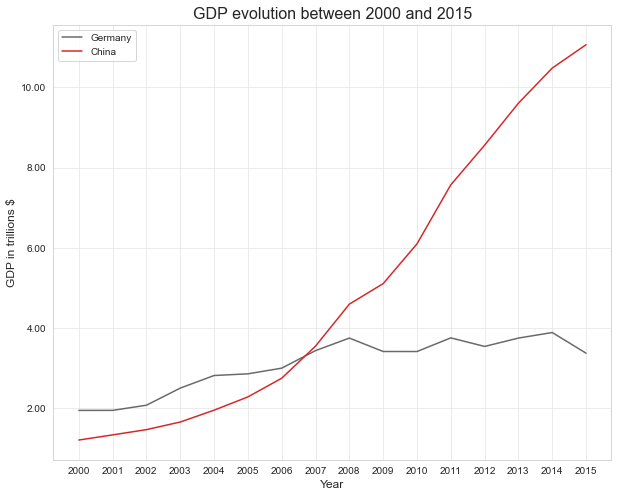

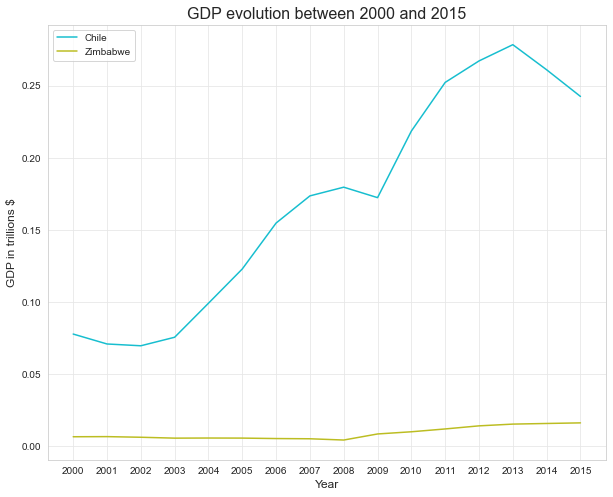

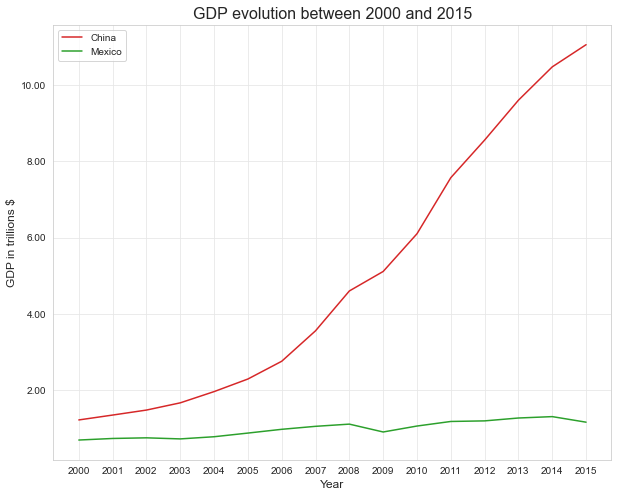

In [18]:
%matplotlib inline

# a library to set up format on ticks
from matplotlib.ticker import FormatStrFormatter

# a dedicated color for each country to ensure consistency between our charts
colordic = {'Chile': pal[9], 'China': pal[3], 'Germany': 'dimgray', 'Mexico': pal[2], 'United States of America': 'steelblue', 'Zimbabwe': pal[8]}

# create the function to compare two countries on a plot and save it as a .png
def compare_gdp(country1, country2):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1)
    sns.lineplot(data = all_data[all_data.Country == country1], x='Year', y='GDP', color=colordic[country1])
    sns.lineplot(data = all_data[all_data.Country == country2], x='Year', y='GDP', color=colordic[country2])
    plt.legend([country1, country2])
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('GDP in trillions $', fontsize=12)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_xticks(years)
    plt.title('GDP evolution between 2000 and 2015', fontsize=16)
    plt.savefig('charts\{}_{}_gdp_comparison.png'.format(country1, country2))
    

compare_gdp('Germany', 'China')
compare_gdp('Chile', 'Zimbabwe')
compare_gdp('China', 'Mexico')



### 3.2. Life Expectancy evolution through the time period
***

We will plot a chart for each country all at once to be able to compare evolution of Life Expectancy through years.

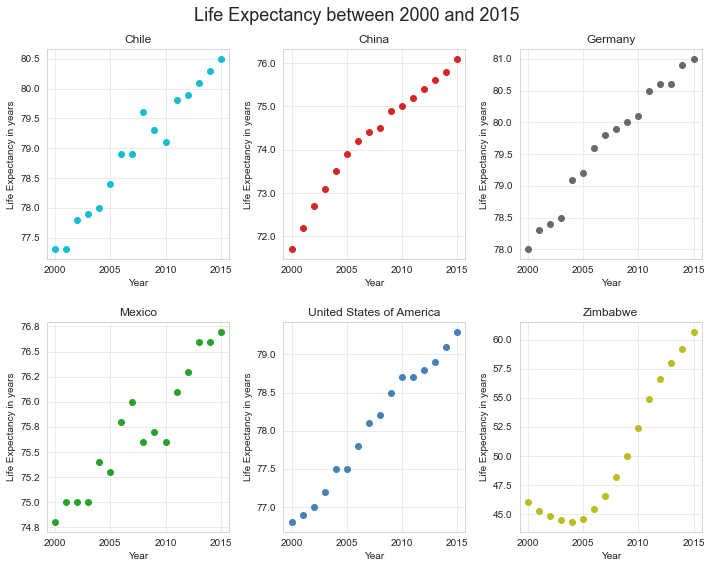

In [19]:
fig2 = plt.figure(figsize=(10, 8))

# use a loop to plot each country in a subplot
for country, i in zip(countries, range(len(countries))):
    ax = plt.subplot(2, 3, i+1)
    ax.scatter(all_data.Year[all_data.Country == country], all_data.Life_expectancy[all_data.Country == country], color=colordic[country])
    ax.set_xlabel('Year')
    ax.set_ylabel('Life Expectancy in years', rotation=90)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_title(country)

# title for our figure
plt.suptitle('Life Expectancy between 2000 and 2015', fontsize=18)

# adjust lay out
plt.tight_layout()
plt.subplots_adjust(hspace=0.30)

# save the chart
plt.savefig('charts\life_exp_years.png')

### 3.3. Relation between GDP and life expectancy
***

Within our six countries, we will have a look to the relation between GDP and Life Expectancy.
We will use the exact same method as above to plot all the chart at once.

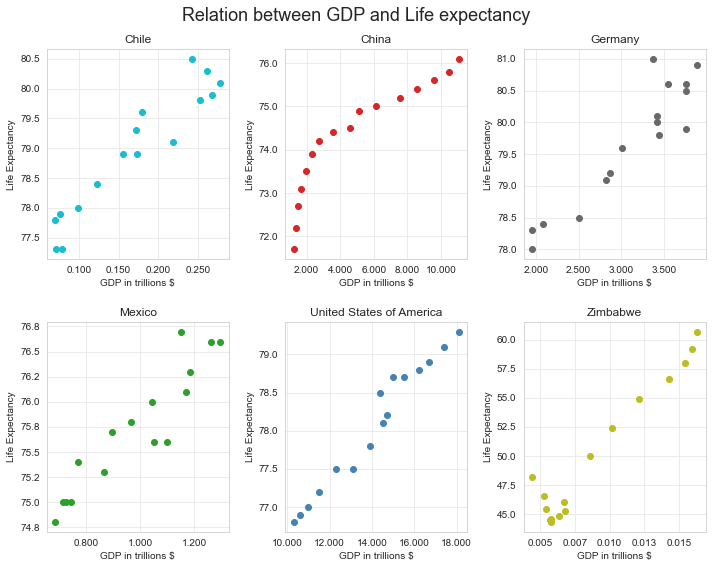

In [8]:
fig3 = plt.figure(figsize=(10, 8))

# use a loop to plot each country in a subplot
for country, i in zip(countries, range(len(countries))):
    ax = plt.subplot(2, 3, i+1)
    ax.scatter(all_data.GDP[all_data.Country == country], all_data.Life_expectancy[all_data.Country == country], color=colordic[country])
    ax.set_xlabel('GDP in trillions $')
    ax.set_ylabel('Life Expectancy', rotation=90)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    ax.set_title(country)

# title for our figure
plt.suptitle('Relation between GDP and Life expectancy', fontsize=18)

# adjust lay out
plt.tight_layout()
plt.subplots_adjust(hspace=0.30)

# save the chart
plt.savefig('charts\life_exp_gdp.png')